In [1]:
import os
import pickle
import itertools 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

In [2]:
results_path = '../results'

In [3]:
exp_data = os.listdir(results_path)
exp_data

['mushrooms',
 'ilpd',
 'banknote',
 'fourclass',
 'svmguide3',
 'transfusion',
 'german_numer',
 'liver-disorders',
 'heart',
 'r2',
 'haberman',
 'svmguide1',
 'breastcancer',
 'australian',
 'diabetes',
 'mammographic',
 'ionosphere',
 'colon-cancer']

### Datasets description

In [4]:
dfs = pd.DataFrame(columns=['instances', 'n_features', 'class_prop'], index=exp_data, data = [])

for exp in exp_data:
    X = pd.read_parquet(f'../data/prep_real_data/{exp}.parquet')
    dfs.loc[exp, 'instances'] = X.shape[0]
    dfs.loc[exp, 'n_features'] = X.shape[1]
    dfs.loc[exp, 'class_prop'] = round(min(X['y'].value_counts()/X.shape[0]), 3)

In [5]:
dfs.sort_index(inplace=True)
dfs

,instances,n_features,class_prop
australian,690,15,0.445
banknote,1372,5,0.445
breastcancer,569,31,0.373
colon-cancer,62,2001,0.355
diabetes,768,9,0.349
fourclass,862,3,0.356
german_numer,1000,25,0.3
haberman,306,4,0.265
heart,270,14,0.444
ilpd,579,11,0.285


### Experiments average results

In [6]:
df_results = pd.DataFrame(index = exp_data, columns = ['MOE SVM', 'MOE KNN', 'MOE DT','Random Forest', 'SVM', 'KNN'])

In [7]:
models_names = ['OverfittedEnsemble.p', 'MOE_knn.p', 'MOE_dt.p','randomforest.p', 'svm.p', 'knn.p']

for exp in exp_data:
    scores = []
    for model in models_names:
        try:
            with open('/'.join(['/'.join([results_path, exp]), model]), 'rb') as fin:
                    scores.append(' ('.join([str(round(elem, 3))  for elem in pickle.load(fin).best_score_] ) + ')')
        except:
            scores.append(None)
    df_results.loc[exp, :] = scores

In [8]:
df_results

,MOE SVM,MOE KNN,MOE DT,Random Forest,SVM,KNN
mushrooms,1.0 (0.001),1.0 (0.001),1.0 (0.001),1.0 (0.0),1.0 (0.0),1.0 (0.0)
ilpd,0.662 (0.062),0.643 (0.063),0.674 (0.041),0.618 (0.049),0.626 (0.055),0.625 (0.086)
banknote,1.0 (0.0),0.999 (0.002),0.99 (0.009),0.995 (0.005),1.0 (0.0),0.999 (0.003)
fourclass,1.0 (0.0),1.0 (0.0),0.99 (0.009),0.998 (0.005),1.0 (0.0),1.0 (0.0)
svmguide3,0.754 (0.035),0.697 (0.041),0.77 (0.072),0.767 (0.062),0.767 (0.043),0.708 (0.056)
transfusion,0.68 (0.042),0.679 (0.056),0.69 (0.061),0.617 (0.068),0.676 (0.048),0.657 (0.04)
german_numer,0.716 (0.04),0.688 (0.038),0.71 (0.04),0.706 (0.027),0.713 (0.027),0.633 (0.042)
liver-disorders,0.748 (0.058),0.752 (0.055),0.765 (0.086),0.762 (0.094),0.724 (0.084),0.715 (0.133)
heart,0.868 (0.056),0.861 (0.066),0.85 (0.065),0.844 (0.072),0.854 (0.059),0.834 (0.07)
r2,0.777 (0.121),0.731 (0.164),0.78 (0.101),0.761 (0.096),0.77 (0.15),0.722 (0.17)


### Algorithms comparison

In [9]:
def rank_matrix(df_rank, proportion=False):
    col_comb = list(itertools.combinations(df_mean.columns.values, 2))
    win_loss_df = pd.DataFrame(index = ['MOE SVM', 'MOE KNN', 'MOE DT','Random Forest', 'SVM', 'KNN'], 
                               columns = ['MOE SVM', 'MOE KNN', 'MOE DT','Random Forest', 'SVM', 'KNN'])
    if proportion==True:
        prop=df_rank.shape[0]
    else:
        prop=1
    for i, j in col_comb:
        win = str(round(sum(df_rank[i] > df_rank[j])/prop, 2))
        tie = str(round(sum(df_rank[i] == df_rank[j])/prop, 2))
        loss = str(round(sum(df_rank[i] < df_rank[j])/prop, 2))
        win_loss_df.loc[i, j] = '-'.join([win, tie, loss])
    return win_loss_df

In [10]:
df_mean = pd.DataFrame(index = exp_data, columns = ['MOE SVM', 'MOE KNN', 'MOE DT','Random Forest', 'SVM', 'KNN'])

In [11]:
models_names = ['OverfittedEnsemble.p', 'MOE_knn.p', 'MOE_dt.p','randomforest.p', 'svm.p', 'knn.p']

for exp in exp_data:
    scores = []
    for model in models_names:
        try:
            with open('/'.join(['/'.join([results_path, exp]), model]), 'rb') as fin:
                    scores.append(round(pickle.load(fin).best_score_[0], 3))
        except:
            scores.append(None)
    df_mean.loc[exp, :] = scores

In [12]:
df_mean

,MOE SVM,MOE KNN,MOE DT,Random Forest,SVM,KNN
mushrooms,1,1,1,1,1,1
ilpd,0.662,0.643,0.674,0.618,0.626,0.625
banknote,1,0.999,0.99,0.995,1,0.999
fourclass,1,1,0.99,0.998,1,1
svmguide3,0.754,0.697,0.77,0.767,0.767,0.708
transfusion,0.68,0.679,0.69,0.617,0.676,0.657
german_numer,0.716,0.688,0.71,0.706,0.713,0.633
liver-disorders,0.748,0.752,0.765,0.762,0.724,0.715
heart,0.868,0.861,0.85,0.844,0.854,0.834
r2,0.777,0.731,0.78,0.761,0.77,0.722


In [13]:
rank_matrix(df_mean, proportion=True)

,MOE SVM,MOE KNN,MOE DT,Random Forest,SVM,KNN
MOE SVM,NaN,0.78-0.11-0.11,0.33-0.11-0.56,0.72-0.06-0.22,0.61-0.22-0.17,0.89-0.11-0.0
MOE KNN,NaN,NaN,0.28-0.06-0.67,0.5-0.06-0.44,0.39-0.11-0.5,0.67-0.17-0.17
MOE DT,NaN,NaN,NaN,0.61-0.11-0.28,0.56-0.11-0.33,0.78-0.06-0.17
Random Forest,NaN,NaN,NaN,NaN,0.17-0.22-0.61,0.56-0.06-0.39
SVM,NaN,NaN,NaN,NaN,NaN,0.83-0.11-0.06
KNN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
rank_matrix(df_mean, proportion=False)

,MOE SVM,MOE KNN,MOE DT,Random Forest,SVM,KNN
MOE SVM,NaN,14.0-2.0-2.0,6.0-2.0-10.0,13.0-1.0-4.0,11.0-4.0-3.0,16.0-2.0-0.0
MOE KNN,NaN,NaN,5.0-1.0-12.0,9.0-1.0-8.0,7.0-2.0-9.0,12.0-3.0-3.0
MOE DT,NaN,NaN,NaN,11.0-2.0-5.0,10.0-2.0-6.0,14.0-1.0-3.0
Random Forest,NaN,NaN,NaN,NaN,3.0-4.0-11.0,10.0-1.0-7.0
SVM,NaN,NaN,NaN,NaN,NaN,15.0-2.0-1.0
KNN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis of MOE hyper-parameters

### MOE SVM

In [15]:
params_df_svm = pd.DataFrame(index = exp_data, columns=['WRAB', 'lambda', 'N. Learners', 'P. Sample'])

In [16]:
for exp in exp_data:
    with open('/'.join(['/'.join([results_path, exp]), 'OverfittedEnsemble.p']), 'rb') as fin:
        params = pickle.load(fin).best_params_
        params_df_svm.loc[exp, 'WRAB'] = params['force_destabilization']
        params_df_svm.loc[exp, 'lambda'] = params['lam']
        params_df_svm.loc[exp, 'N. Learners'] = params['n_learners']
        params_df_svm.loc[exp, 'P. Sample'] = params['prop_sample']

In [17]:
# params_df_svm.loc['transfusion', 'P. Sample'] = 0.1
params_df_svm['lambda'] = params_df_svm['lambda'].astype(int)
params_df_svm['N. Learners'] = params_df_svm['N. Learners'].astype(int)
params_df_svm['P. Sample'] = params_df_svm['P. Sample'].astype(float)

In [18]:
params_df_svm.groupby(['lambda'],as_index=False).size()

,lambda,size
0,1,5
1,3,5
2,5,8


In [19]:
params_df_svm.groupby(['WRAB'],as_index=False).size()

,WRAB,size
0,False,6
1,True,12


In [20]:
params_df_svm.groupby(['N. Learners'],as_index=False).size()

,N. Learners,size
0,10,2
1,20,3
2,30,13


In [21]:
params_df_svm.groupby(['P. Sample'],as_index=False).size()

,P. Sample,size
0,0.1,3
1,0.2,7
2,0.3,8


In [22]:
params_df_svm

,WRAB,lambda,N. Learners,P. Sample
mushrooms,True,1,10,0.2
ilpd,True,5,30,0.3
banknote,False,1,20,0.2
fourclass,False,1,10,0.2
svmguide3,True,3,30,0.3
transfusion,True,5,30,0.3
german_numer,True,5,30,0.2
liver-disorders,False,5,20,0.1
heart,False,3,30,0.1
r2,True,5,30,0.3


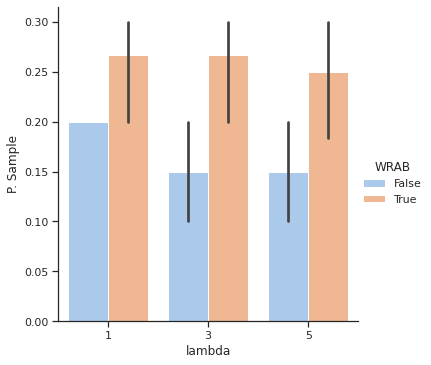

In [23]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_svm);

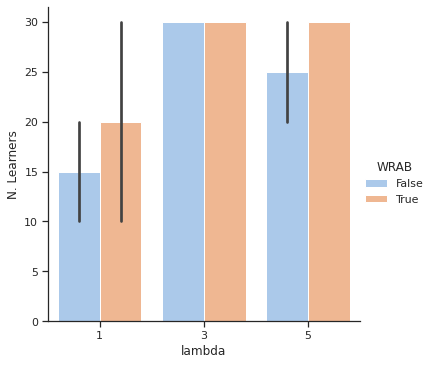

In [24]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_svm);

### MODE DT

In [25]:
params_df_dt = pd.DataFrame(index = exp_data, columns=['WRAB', 'lambda', 'N. Learners', 'P. Sample'])

In [26]:
for exp in exp_data:
    with open('/'.join(['/'.join([results_path, exp]), 'MOE_dt.p']), 'rb') as fin:
        params = pickle.load(fin).best_params_
        params_df_dt.loc[exp, 'WRAB'] = params['force_destabilization']
        params_df_dt.loc[exp, 'lambda'] = params['lam']
        params_df_dt.loc[exp, 'N. Learners'] = params['n_learners']
        params_df_dt.loc[exp, 'P. Sample'] = params['prop_sample']

In [27]:
params_df_dt['lambda'] = params_df_dt['lambda'].astype(int)
params_df_dt['N. Learners'] = params_df_dt['N. Learners'].astype(int)
params_df_dt['P. Sample'] = params_df_dt['P. Sample'].astype(float)

In [28]:
params_df_dt.groupby(['lambda'],as_index=False).size()

,lambda,size
0,1,9
1,3,3
2,5,6


In [29]:
params_df_dt.groupby(['WRAB'],as_index=False).size()

,WRAB,size
0,False,8
1,True,10


In [30]:
params_df_dt.groupby(['N. Learners'],as_index=False).size()

,N. Learners,size
0,10,4
1,20,6
2,30,8


In [31]:
params_df_dt.groupby(['P. Sample'],as_index=False).size()

,P. Sample,size
0,0.1,3
1,0.2,3
2,0.3,12


In [32]:
params_df_dt

,WRAB,lambda,N. Learners,P. Sample
mushrooms,True,1,10,0.2
ilpd,True,1,30,0.2
banknote,False,1,10,0.3
fourclass,False,1,30,0.3
svmguide3,False,1,20,0.3
transfusion,True,5,30,0.3
german_numer,True,1,30,0.1
liver-disorders,True,5,30,0.3
heart,False,3,30,0.1
r2,True,1,20,0.3


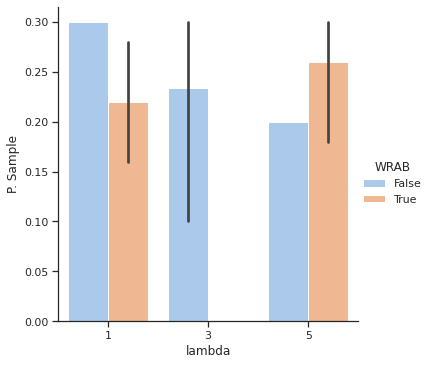

In [33]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_dt);

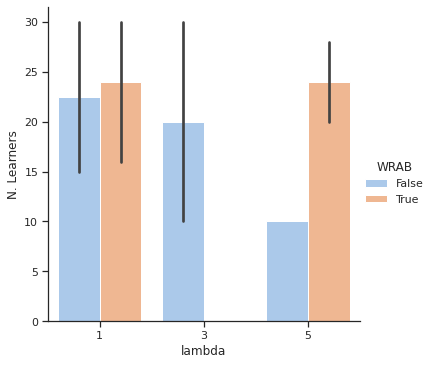

In [34]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_dt);

### MOE Knn

In [35]:
params_df_knn = pd.DataFrame(index = exp_data, columns=['WRAB', 'lambda', 'N. Learners', 'P. Sample'])

In [36]:
for exp in exp_data:
    with open('/'.join(['/'.join([results_path, exp]), 'MOE_knn.p']), 'rb') as fin:
        params = pickle.load(fin).best_params_
        params_df_knn.loc[exp, 'WRAB'] = params['force_destabilization']
        params_df_knn.loc[exp, 'lambda'] = params['lam']
        params_df_knn.loc[exp, 'N. Learners'] = params['n_learners']
        params_df_knn.loc[exp, 'P. Sample'] = params['prop_sample']

In [37]:
params_df_knn['lambda'] = params_df_knn['lambda'].astype(int)
params_df_knn['N. Learners'] = params_df_knn['N. Learners'].astype(int)
params_df_knn['P. Sample'] = params_df_knn['P. Sample'].astype(float)

In [38]:
params_df_knn.groupby(['lambda'],as_index=False).size()

,lambda,size
0,1,7
1,3,5
2,5,6


In [39]:
params_df_knn.groupby(['WRAB'],as_index=False).size()

,WRAB,size
0,False,4
1,True,14


In [40]:
params_df_knn.groupby(['N. Learners'],as_index=False).size()

,N. Learners,size
0,10,6
1,20,4
2,30,8


In [41]:
params_df_knn.groupby(['P. Sample'],as_index=False).size()

,P. Sample,size
0,0.1,7
1,0.2,4
2,0.3,7


In [42]:
params_df_knn

,WRAB,lambda,N. Learners,P. Sample
mushrooms,True,1,20,0.3
ilpd,True,5,30,0.1
banknote,True,1,10,0.2
fourclass,True,1,10,0.3
svmguide3,True,3,10,0.2
transfusion,False,3,10,0.2
german_numer,True,5,30,0.1
liver-disorders,True,3,20,0.1
heart,True,1,30,0.1
r2,False,1,10,0.3


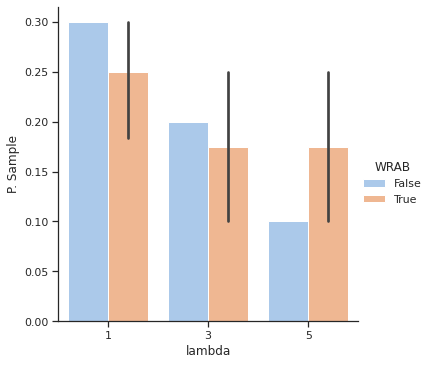

In [43]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_knn);

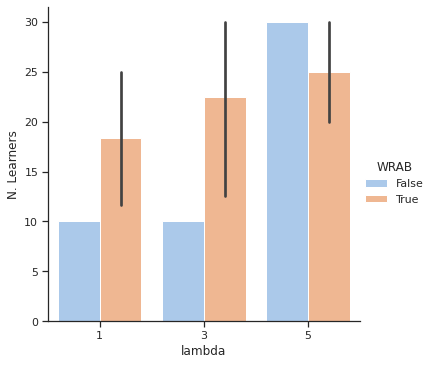

In [44]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_knn);